In [1]:
from DNAFlex.psf import GaussianPSF, negloglike
from scipy.special import erf
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

I0=5000.0


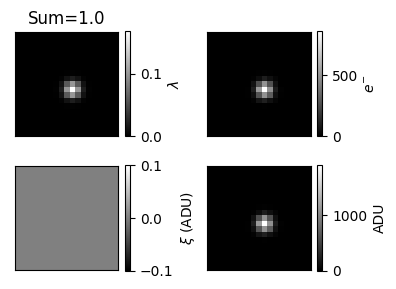

In [2]:
L = 19
omat = np.ones((L,L))
gain0 = 2.2
rmu0 = 0
rvar0 = 0
gain = gain0*omat #ADU/e-
rmu = rmu0*omat #ADU
rvar = rvar0*omat #ADU^2
pixel_size = 108.3 #nm
sigma = 0.22*640/1.4 #zhang 2007
sigma = sigma = sigma/pixel_size
N0 = 10000 #cps
texp = 1 #seconds
eta = 0.5 #quantum efficiency
I0 = eta*N0*texp #expected number of photons during exposure time (assume lam0 is determined for now)
x0,y0 = (8.0,5.0)

print(f'I0={I0}')
psf = GaussianPSF(x0,y0,L,I0,sigma,gain,rmu,rvar)
adu = psf.generate(plot=True)

In [3]:
x0,y0,sigma,N0 = 10.0,10.0,1.0,1000.0 #parameter guess
theta = np.array([x0,y0,sigma,N0])
counts = np.round(adu/gain).astype(int) + 1e-8

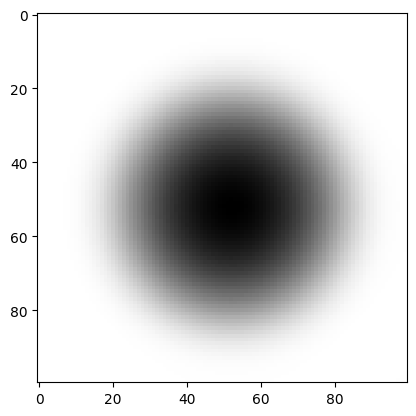

In [4]:
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
xx, yy = np.meshgrid(x, y)

lsurf = np.zeros_like(xx)  # create an empty array to store the results

for i in range(len(x)):
    for j in range(len(y)):
        theta = np.array([xx[i,j],yy[i,j],sigma,N0])
        lsurf[i,j] = negloglike(theta,counts,eta,texp)

plt.imshow(lsurf,cmap='gray')
plt.show()

In [5]:
#Maximum Likelihood Estimation

theta0 = np.array([7.0,7.0,2.0,1000.0]) #initial guess
result = minimize(negloglike, theta0, args=(counts,eta,texp))

# Retrieve the optimal parameter values from the output
theta_mle = result.x

print("Maximum likelihood estimate for theta:", theta_mle)

Maximum likelihood estimate for theta: [  10.00604063   10.02028011    0.91679127 9941.86568728]
